In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

IMPORT DATASET

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\iris\\iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.columns=["sl","sw","pl","pw","class"]
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['class'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: class, dtype: int64

In [7]:
df['class']=df['class'].map({'Setosa':0,'Versicolor':1,'Virginica':2})
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


CHECKING FOR OUTLIERS

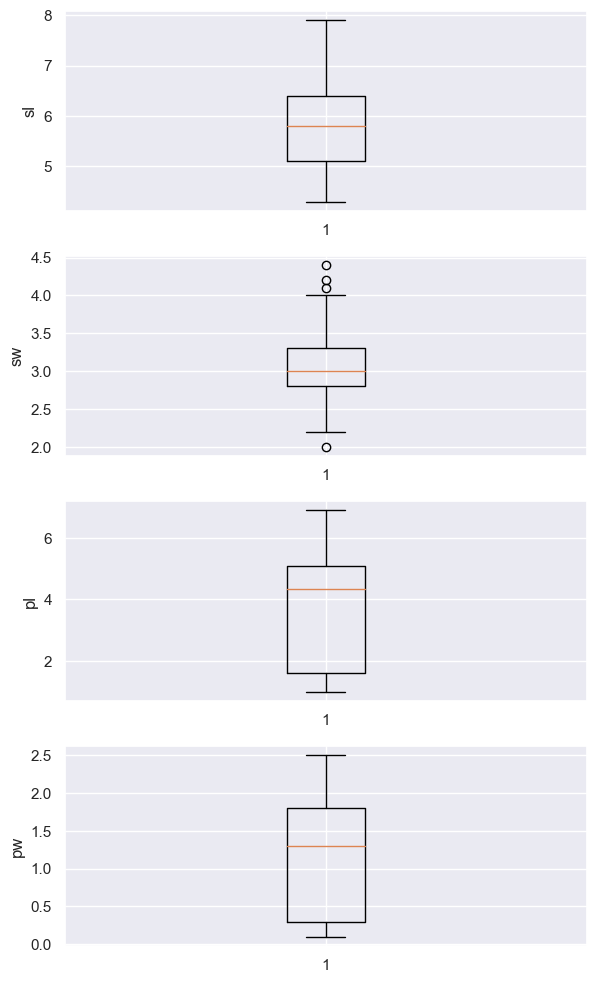

In [8]:
visual_data=df.iloc[:,:-1]
fig,ax=plt.subplots(4,1,figsize=(6,10))
i=0
for col in visual_data.columns:
    ax[i].boxplot(visual_data[col])
    ax[i].set_ylabel(col)
    i+=1
plt.tight_layout()
plt.show()

In [9]:
x=df[(df['sw']>4.0) | (df['sw']==2.0)]
print(x)

     sl   sw   pl   pw  class
15  5.7  4.4  1.5  0.4      0
32  5.2  4.1  1.5  0.1      0
33  5.5  4.2  1.4  0.2      0
60  5.0  2.0  3.5  1.0      1


DROPPING THE OUTLIERS

In [10]:
df.drop(x.index,axis=0,inplace=True)

In [11]:
df.shape

(146, 5)

In [12]:
from sklearn.cluster import KMeans
new=df.iloc[:,:-1]

In [13]:
score=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(new)
    score.append(model.inertia_)

IMPLEMENTING ELBOW METHOD TO CHECK THE BEST K-VALUE

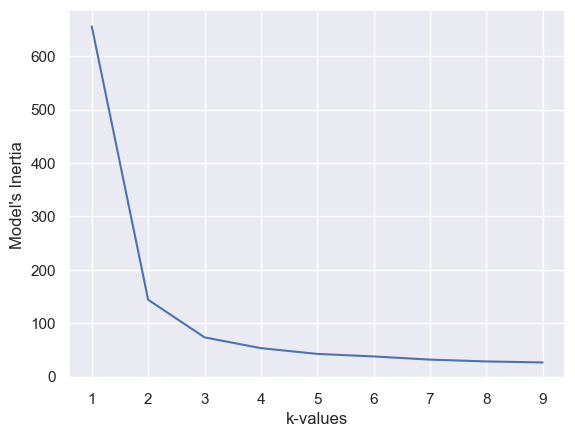

In [14]:
sns.lineplot(x=range(1,10),y=score)
plt.xlabel("k-values")
plt.ylabel("Model's Inertia")
plt.show()

MODEL FITTING AND PREDICTING

In [15]:
fmodel=KMeans(n_clusters=2)
fmodel.fit(new)

KMeans(n_clusters=2)

In [16]:
x=[5.2,2.5,3.2,1.4]
fmodel.predict([x])

array([0])

In [17]:
class1=df[df['class']==1]
class1[(class1['sl']>5.0) & (class1['sl']<5.5)].head()

,sl,sw,pl,pw,class
59,5.2,2.7,3.9,1.4,1
84,5.4,3.0,4.5,1.5,1
98,5.1,2.5,3.0,1.1,1


VISUALIZING THE DATA

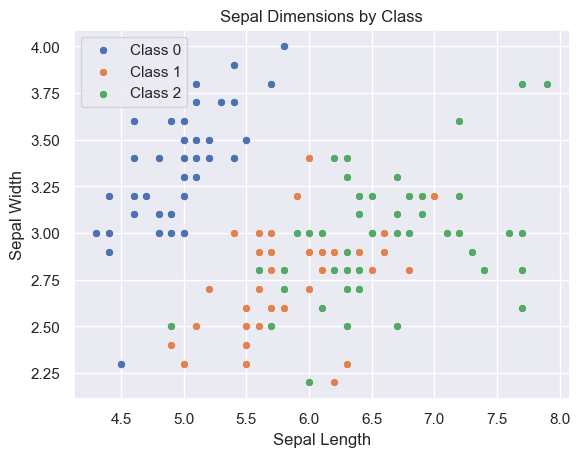

In [18]:
#sns.scatterplot(x=df['sl'],y=df['sw'],hue=df['class'],palette='Set1')
for cls in df['class'].unique():
    sns.scatterplot( x='sl',y='sw',data=df[df['class']==cls],label=f'Class {cls}')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Dimensions by Class')
plt.legend()
plt.show()

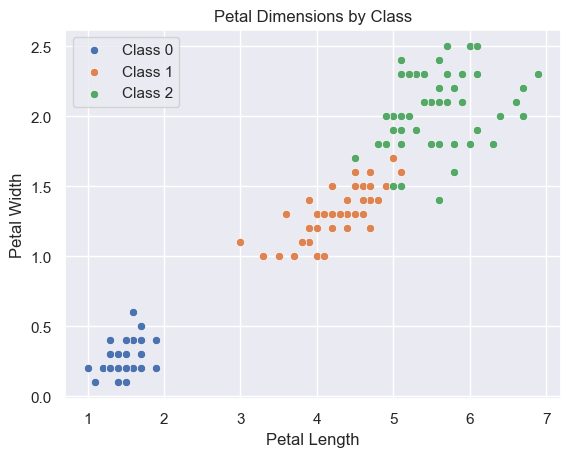

In [19]:
#sns.scatterplot(x=df['pl'],y=df['pw'],hue=df['class'],palette='Set1')
for cls in df['class'].unique():
    sns.scatterplot( x='pl',y='pw',data=df[df['class']==cls],label=f'Class {cls}')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Dimensions by Class')
plt.legend()
plt.show()